In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('Movie_regression.xls')
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [5]:
print(df['Time_taken'].mean())
print(df['Time_taken'].median())
print(df['Time_taken'].mode())

157.3914979757085
160.0
0    119.36
1    171.28
2    189.56
Name: Time_taken, dtype: float64


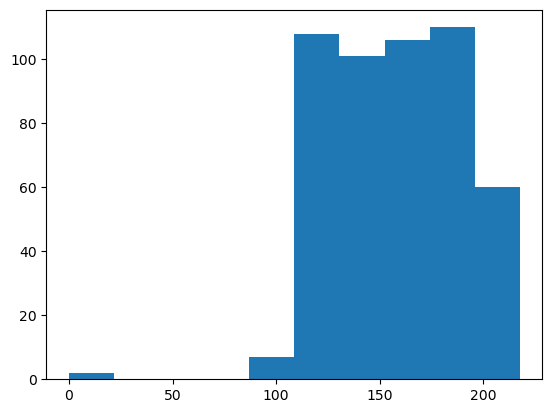

In [6]:
import matplotlib.pyplot as plt
plt.hist((df['Time_taken']))
plt.show()
        

In [7]:
df['Time_taken'].fillna(df['Time_taken'].median(), inplace= True)

In [8]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [9]:
cat= []
num= []

In [10]:
for i in df.columns:
    if df[i].dtype== 'object':
        cat.append(i)
    else:
        num.append(i)

In [11]:
cat

['3D_available', 'Genre']

In [12]:
num

['Marketing expense',
 'Production expense',
 'Multiplex coverage',
 'Budget',
 'Movie_length',
 'Lead_ Actor_Rating',
 'Lead_Actress_rating',
 'Director_rating',
 'Producer_rating',
 'Critic_rating',
 'Trailer_views',
 'Time_taken',
 'Twitter_hastags',
 'Avg_age_actors',
 'Num_multiplex',
 'Collection']

In [13]:
q1= df['Marketing expense'].quantile(0.25)
q3= df['Marketing expense'].quantile(0.75)
iqr= q3-q1
lf= q1- 1.5*iqr
uf= q3+ 1.5*iqr
outliers= df[(df['Marketing expense']<lf) & (df['Marketing expense']>uf)]
print("percentage of outliers in", i ,outliers.shape[0]*100/df.shape[0])

percentage of outliers in Collection 0.0


In [14]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()
    


Percentage of outliers in Marketing expense 13.043478260869565


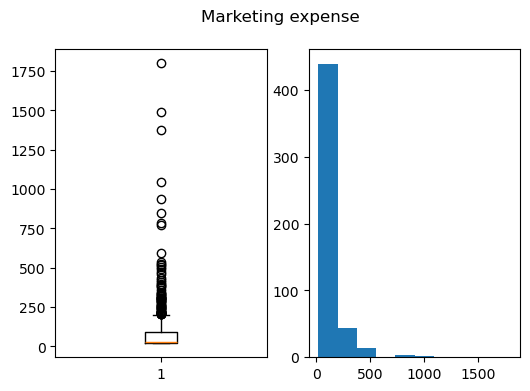

None
+++====+++
Percentage of outliers in Production expense 0.0


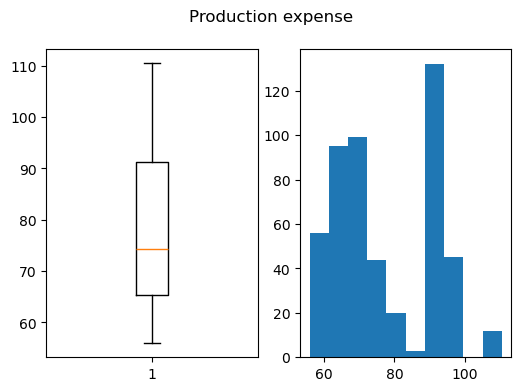

None
+++====+++
Percentage of outliers in Multiplex coverage 0.0


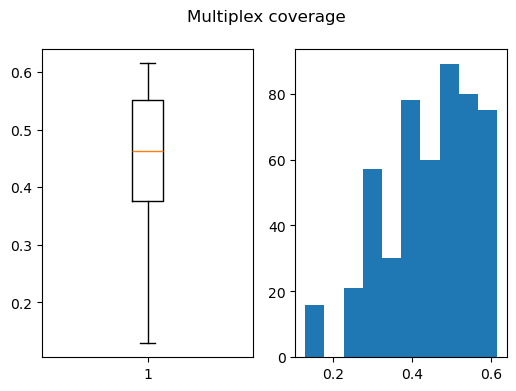

None
+++====+++
Percentage of outliers in Budget 5.928853754940712


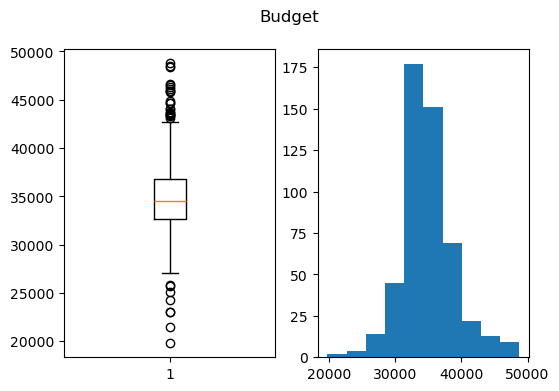

None
+++====+++
Percentage of outliers in Movie_length 0.0


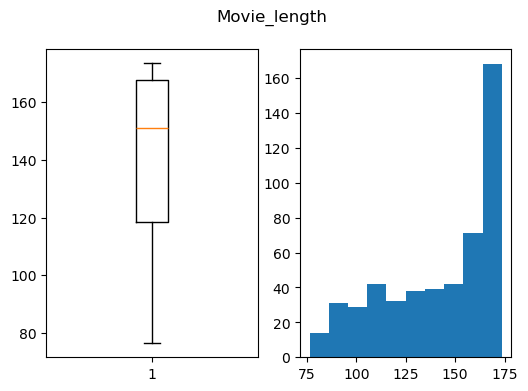

None
+++====+++
Percentage of outliers in Lead_ Actor_Rating 0.9881422924901185


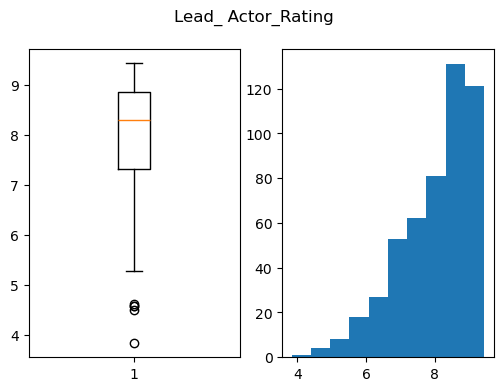

None
+++====+++
Percentage of outliers in Lead_Actress_rating 0.9881422924901185


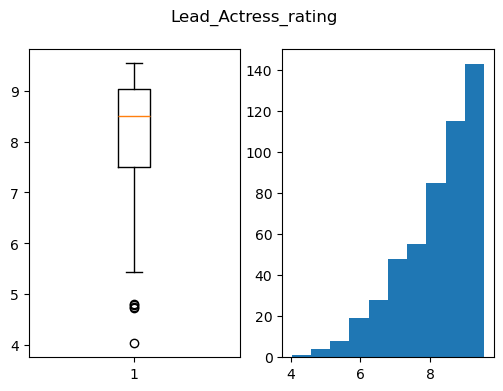

None
+++====+++
Percentage of outliers in Director_rating 0.9881422924901185


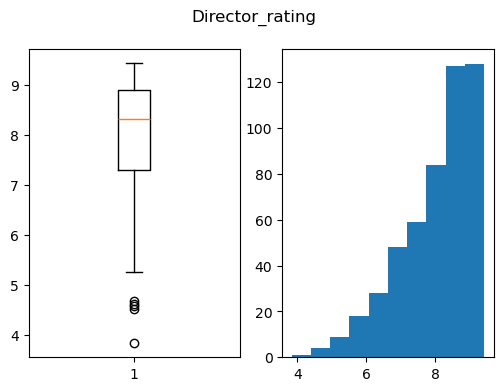

None
+++====+++
Percentage of outliers in Producer_rating 0.9881422924901185


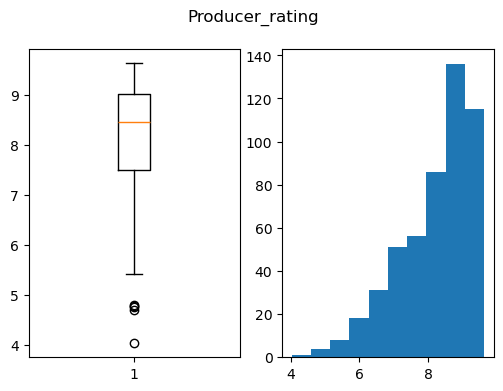

None
+++====+++
Percentage of outliers in Critic_rating 0.0


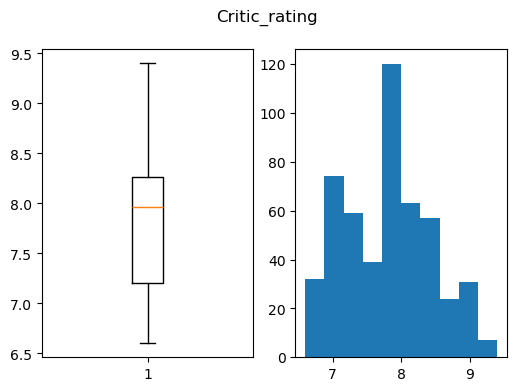

None
+++====+++
Percentage of outliers in Trailer_views 1.976284584980237


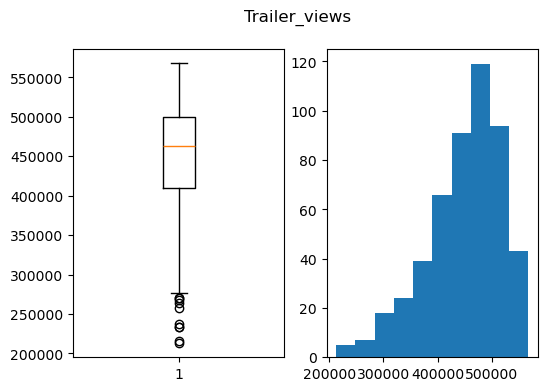

None
+++====+++
Percentage of outliers in Time_taken 0.3952569169960474


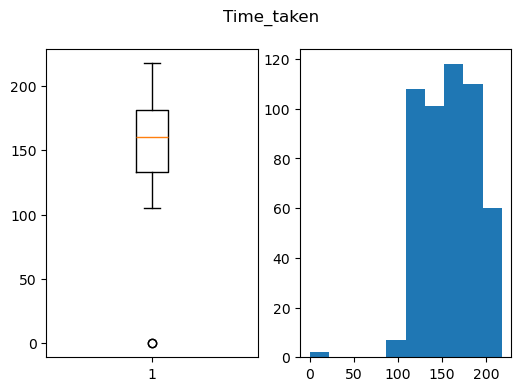

None
+++====+++
Percentage of outliers in Twitter_hastags 0.3952569169960474


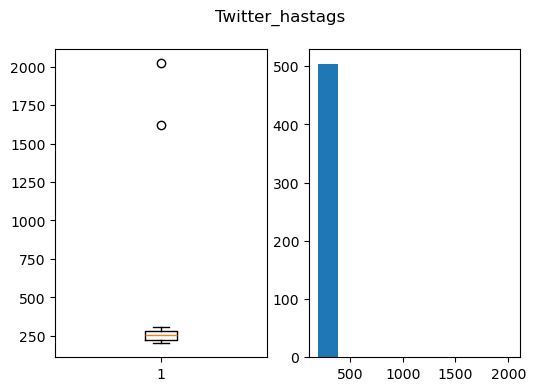

None
+++====+++
Percentage of outliers in Avg_age_actors 0.0


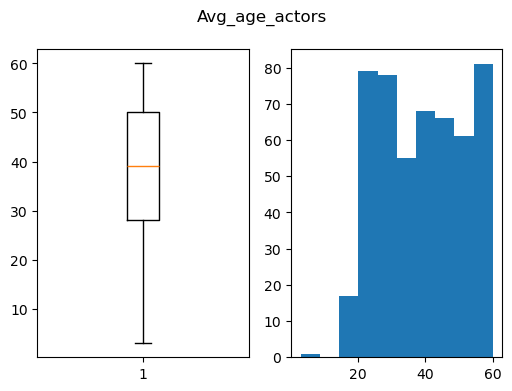

None
+++====+++
Percentage of outliers in Num_multiplex 0.7905138339920948


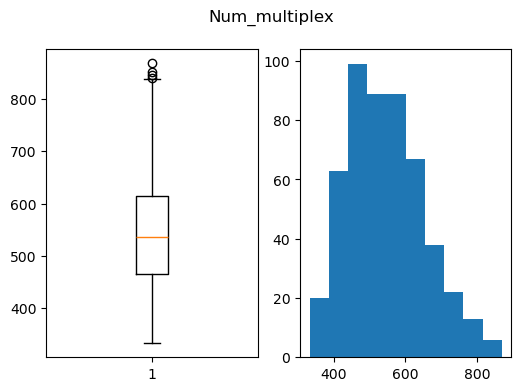

None
+++====+++
Percentage of outliers in Collection 7.707509881422925


C:\Users\komal\AppData\Local\Temp\ipykernel_14808\417328301.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '535.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()


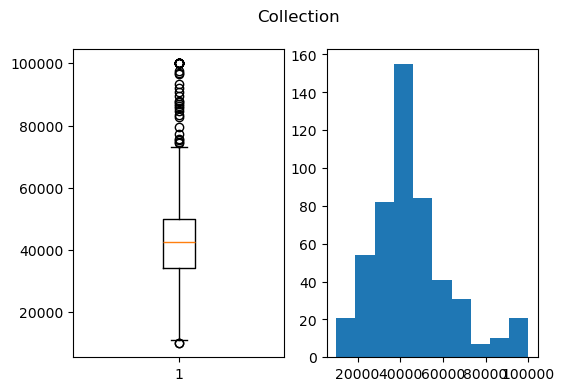

None
+++====+++


In [15]:
for col in num:
    print(outlier_detection_treatment(col))
    print("+++====+++")


In [16]:
cat

['3D_available', 'Genre']

In [17]:
import seaborn as sns

def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

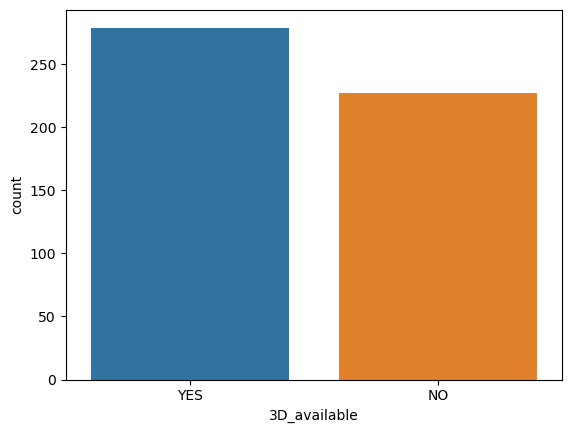

None


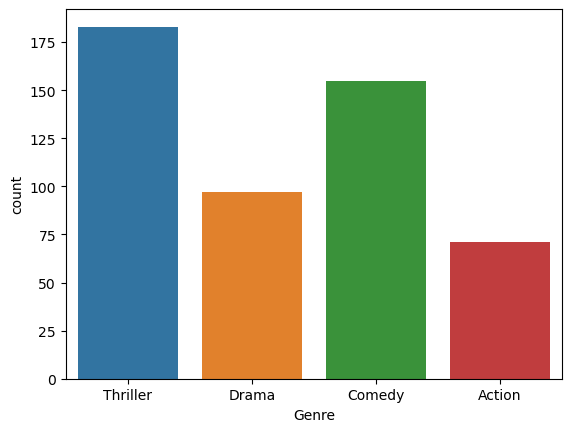

None


In [18]:
for i in cat:
    print(cat_analysis(i))

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()
df['3D_available']= le.fit_transform(df['3D_available'])

In [21]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,1,109.60,223.840,Thriller,23,494.0,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,0,146.64,243.456,Drama,42,462.0,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,0,147.88,254.400,Comedy,38,458.0,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,1,185.36,225.344,Drama,45,472.0,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,0,176.48,225.792,Drama,55,395.0,72400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,0,186.96,243.584,Action,27,561.0,44800
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,1,132.24,263.296,Action,20,600.0,41200
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,0,109.56,243.824,Comedy,31,576.0,47800
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,1,158.80,303.520,Comedy,47,607.0,44000


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe= OneHotEncoder(sparse_output= False)
np_genre= ohe.fit_transform(df[["Genre"]])
df_genre= pd.DataFrame(np_genre,columns= ohe.categories_ )
df_genre.drop('Action', axis= 1, inplace=True)

In [24]:
df_genre

,Comedy,Drama,Thriller
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
501,0.0,0.0,0.0
502,0.0,0.0,0.0
503,1.0,0.0,0.0
504,1.0,0.0,0.0


In [25]:
X= df.drop(['Collection', 'Genre'], axis= 1)
X= pd.concat([X, df_genre], axis= 1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    int32  
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Avg_age_actors       506 non-null    int64  
 15  Num_multiplex        506 non-null    flo

In [26]:
X.columns

Index([  'Marketing expense',  'Production expense',  'Multiplex coverage',
                    'Budget',        'Movie_length',  'Lead_ Actor_Rating',
       'Lead_Actress_rating',     'Director_rating',     'Producer_rating',
             'Critic_rating',       'Trailer_views',        '3D_available',
                'Time_taken',     'Twitter_hastags',      'Avg_age_actors',
             'Num_multiplex',           ('Comedy',),            ('Drama',),
               ('Thriller',)],
      dtype='object')

In [27]:
for i in X.columns:
    print("Minimum value of ",i, X[i].min(),"Maximum value of ",i, X[i].max() )

Minimum value of  Marketing expense 20.1264 Maximum value of  Marketing expense 199.6592
Minimum value of  Production expense 55.92 Maximum value of  Production expense 110.48
Minimum value of  Multiplex coverage 0.129 Maximum value of  Multiplex coverage 0.615
Minimum value of  Budget 27108.4 Maximum value of  Budget 42723.505
Minimum value of  Movie_length 76.4 Maximum value of  Movie_length 173.5
Minimum value of  Lead_ Actor_Rating 5.28 Maximum value of  Lead_ Actor_Rating 9.435
Minimum value of  Lead_Actress_rating 5.445 Maximum value of  Lead_Actress_rating 9.54
Minimum value of  Director_rating 5.26 Maximum value of  Director_rating 9.425
Minimum value of  Producer_rating 5.42 Maximum value of  Producer_rating 9.635
Minimum value of  Critic_rating 6.6 Maximum value of  Critic_rating 9.4
Minimum value of  Trailer_views 276179 Maximum value of  Trailer_views 567784
Minimum value of  3D_available 0 Maximum value of  3D_available 1
Minimum value of  Time_taken 105.36 Maximum value o

In [28]:
y= df['Collection']

In [29]:
X= X.values
y= y.values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 90)

In [32]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred= lr.predict(X_test)

In [34]:
y_pred

array([51752.97569092, 59663.38804653, 50856.67963066, 43159.33381025,
       49011.97503898, 41898.68253977, 39179.98131732, 42190.17547593,
       31058.80523818, 34990.28850134, 48461.02796008, 50405.0807182 ,
       54442.82000247, 27742.83402494, 56547.48537042, 33147.36078051,
       23989.12983027, 51026.12495317, 38775.74581883, 27008.01497046,
       50280.84229827, 37651.94565171, 56473.23236761, 35617.50792364,
       49233.21369886, 37269.19775677, 46670.45250872, 34155.52100997,
       30935.32077888, 50164.78280367, 53806.29463244, 45977.89158618,
       38633.96612947, 24145.93975801, 40895.32928629, 57629.41779252,
       55560.78338557, 36163.38528565, 34536.06530532, 30625.61124776,
       51734.29886472, 39961.82948993, 29308.86013764, 55924.42843391,
       34150.9184646 , 49703.90754898, 37097.97106452, 26329.94013772,
       35772.71304413, 36927.84465165, 49794.46206102, 31348.9634312 ,
       44966.16255145, 43443.88175945, 31595.15205811, 29940.92832957,
      

In [35]:
y

array([48000, 43200, 69400, 66800, 72400, 57400, 45800, 44200, 33000,
       37800, 30000, 37800, 43400, 40800, 36400, 39800, 46200, 35000,
       40400, 36400, 27200, 39200, 30400, 29000, 31200, 27800, 33200,
       29600, 36800, 42000, 25400, 29000, 26400, 26200, 27000, 37800,
       40000, 42000, 48400, 61600, 69800, 53200, 50600, 49400, 42400,
       38600, 40000, 33200, 28800, 38800, 39400, 41000, 50000, 46800,
       37800, 70800, 49400, 63200, 46600, 39200, 37400, 32000, 44400,
       50000, 66000, 47000, 38800, 44000, 34800, 41800, 48400, 43400,
       45600, 46800, 48200, 42800, 40000, 41600, 42400, 40600, 56000,
       47800, 49600, 45800, 47800, 53200, 45000, 44400, 47200, 57400,
       45200, 44000, 45800, 50000, 41200, 56800, 42800, 42400, 42400,
       66400, 55000, 53000, 37200, 38600, 40200, 39000, 39000, 40800,
       39600, 38800, 43400, 45600, 37600, 37400, 37000, 36600, 42400,
       38400, 40800, 38600, 44000, 40600, 41000, 34600, 37600, 42800,
       31400, 32400,

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred)**0.5)

8882.949808906425


In [37]:
print(r2_score(y_test,y_pred))

0.4830665554108965


In [38]:
y

array([48000, 43200, 69400, 66800, 72400, 57400, 45800, 44200, 33000,
       37800, 30000, 37800, 43400, 40800, 36400, 39800, 46200, 35000,
       40400, 36400, 27200, 39200, 30400, 29000, 31200, 27800, 33200,
       29600, 36800, 42000, 25400, 29000, 26400, 26200, 27000, 37800,
       40000, 42000, 48400, 61600, 69800, 53200, 50600, 49400, 42400,
       38600, 40000, 33200, 28800, 38800, 39400, 41000, 50000, 46800,
       37800, 70800, 49400, 63200, 46600, 39200, 37400, 32000, 44400,
       50000, 66000, 47000, 38800, 44000, 34800, 41800, 48400, 43400,
       45600, 46800, 48200, 42800, 40000, 41600, 42400, 40600, 56000,
       47800, 49600, 45800, 47800, 53200, 45000, 44400, 47200, 57400,
       45200, 44000, 45800, 50000, 41200, 56800, 42800, 42400, 42400,
       66400, 55000, 53000, 37200, 38600, 40200, 39000, 39000, 40800,
       39600, 38800, 43400, 45600, 37600, 37400, 37000, 36600, 42400,
       38400, 40800, 38600, 44000, 40600, 41000, 34600, 37600, 42800,
       31400, 32400,

In [39]:
! pip install --upgrade gradio


   ---------------------------------------- 0.0/57.1 MB ? eta -:--:--
   -- ------------------------------------- 3.9/57.1 MB 19.5 MB/s eta 0:00:03
   ---- ----------------------------------- 6.6/57.1 MB 16.1 MB/s eta 0:00:04
   ------ --------------------------------- 9.4/57.1 MB 15.0 MB/s eta 0:00:04
   -------- ------------------------------- 12.1/57.1 MB 14.5 MB/s eta 0:00:04
   --------- ------------------------------ 14.2/57.1 MB 13.3 MB/s eta 0:00:04
   ------------ --------------------------- 17.8/57.1 MB 13.9 MB/s eta 0:00:03
   -------------- ------------------------- 20.4/57.1 MB 13.9 MB/s eta 0:00:03
   ---------------- ----------------------- 23.3/57.1 MB 13.7 MB/s eta 0:00:03
   ------------------ --------------------- 26.2/57.1 MB 13.6 MB/s eta 0:00:03
   -------------------- ------------------- 28.8/57.1 MB 13.5 MB/s eta 0:00:03
   ---------------------- ----------------- 31.7/57.1 MB 13.5 MB/s eta 0:00:02
   ------------------------ --------------- 34.6/57.1 MB 13.5 MB

In [40]:
pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [44]:
# huggingface-cli login

In [45]:
# gradio deploy

In [46]:
import gradio as gr
import numpy as np
import pickle


# Define the prediction function
def predict_marketing_expense(*features):
    features = np.array(features).reshape(1, -1)
    prediction = lr.predict(features)
    return prediction[0]

# Define the interface with reference ranges
inputs = [
    gr.Slider(minimum=20.1264, maximum=199.6592, label="Marketing expense"),
    gr.Slider(minimum=55.92, maximum=110.48, label="Production expense"),
    gr.Slider(minimum=0.129, maximum=0.615, label="Multiplex coverage"),
    gr.Slider(minimum=27108.4, maximum=42723.505, label="Budget"),
    gr.Slider(minimum=76.4, maximum=173.5, label="Movie length"),
    gr.Slider(minimum=5.28, maximum=9.435, label="Lead Actor Rating"),
    gr.Slider(minimum=5.445, maximum=9.54, label="Lead Actress Rating"),
    gr.Slider(minimum=5.26, maximum=9.425, label="Director Rating"),
    gr.Slider(minimum=5.42, maximum=9.635, label="Producer Rating"),
    gr.Slider(minimum=6.6, maximum=9.4, label="Critic Rating"),
    gr.Slider(minimum=276179, maximum=567784, label="Trailer views"),
    gr.Checkbox(label="3D available"),
    gr.Slider(minimum=105.36, maximum=217.52, label="Time taken"),
    gr.Slider(minimum=201.152, maximum=308.0, label="Twitter hashtags"),
    gr.Slider(minimum=3, maximum=60, label="Average age of actors"),
    gr.Slider(minimum=333.0, maximum=838.0, label="Number of multiplex"),
    gr.Slider(label="Comedy"),
    gr.Slider(label="Drama"),
    gr.Slider(label="Thriller")
]

output = gr.Textbox(label="Prediction")

# Sample inputs for demonstration
sample_inputs = [2.0126400e+01, 5.9620000e+01, 4.6200000e-01, 3.6524125e+04,
       1.3870000e+02, 7.8250000e+00, 8.0950000e+00, 7.9100000e+00,
       7.9950000e+00, 7.9400000e+00, 5.2736700e+05, 1.0000000e+00,
       1.0960000e+02, 2.2384000e+02, 2.3000000e+01, 4.9400000e+02,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00]

# Launch the interface
iface = gr.Interface(fn=predict_marketing_expense, inputs=inputs, outputs=output, examples=[sample_inputs])
iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://00d76b109a376ff213.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [47]:
sample_inputs = [2.0126400e+01, 5.9620000e+01, 4.6200000e-01, 3.6524125e+04,
       1.3870000e+02, 7.8250000e+00, 8.0950000e+00, 7.9100000e+00,
       7.9950000e+00, 7.9400000e+00, 5.2736700e+05, 1.0000000e+00,
       1.0960000e+02, 2.2384000e+02, 2.3000000e+01, 4.9400000e+02,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00]

predict_marketing_expense(sample_inputs)

53433.1937440146

In [49]:
X[0, :]

array([2.0126400e+01, 5.9620000e+01, 4.6200000e-01, 3.6524125e+04,
       1.3870000e+02, 7.8250000e+00, 8.0950000e+00, 7.9100000e+00,
       7.9950000e+00, 7.9400000e+00, 5.2736700e+05, 1.0000000e+00,
       1.0960000e+02, 2.2384000e+02, 2.3000000e+01, 4.9400000e+02,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00])

In [50]:
y[0]

48000